In [1]:
#Accuracy - around 80%
#Run Feature importance after reaching 70+ % (feature impotance)
#Annual income is 80% that determines if they will pay off or not
#Graph out above % and present to class
#What are the questions to ask customers

In [2]:
#Export graphviz
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
#New Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
#from xgboost.xgbclassifier import XGBClassifier
#from sklearn import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

/Users/HS/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#!pip install xgboost

In [4]:
df = pd.read_csv('LoansTrainingSet.csv')

/Users/HS/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [6]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [8]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


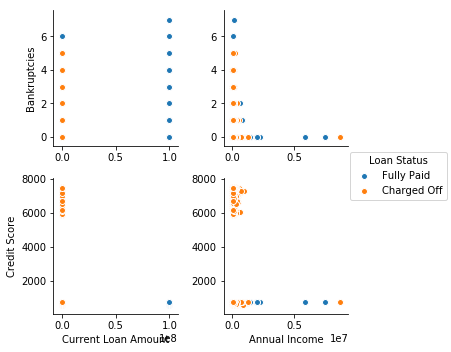

In [9]:
sns.pairplot(df, hue = 'Loan Status', x_vars = ['Current Loan Amount', 'Annual Income'] , y_vars = ['Bankruptcies','Credit Score'])

In [10]:
#OBSERVATIONS

#Loan ID - It is not unique. Unique value is 215700, out of 256984. No null values
    #types of duplicste rows
        #1. Exact same row repeats
        #2. One row has few null values and the other one has all values
        #3. Few data points slightly different between the rows
#Customer ID - Same obervations as Loan ID. No null values

#Loan Status - 2 values. No nulls. This is the train/predict column. 
#Current Loan Amount - No nulls
#Term - 2 values. No nulls
#Credit Score - 23.9% nulls. Need to clean up values greater than 800
#Years in current job - 12 unique values. No nulls
#Home Ownership - 4 unique values. No nulls
#Annual Income - 23.9% nulls
#Purpose - 10 unique values and no nulls
#Monthly Debt - No nulls
#Years of Credit History - No nulls
#Months since last delinquent - 54.6% nulls
#Number of Open Accounts - No nulls
#Number of Credit Problems - No nulls
#Current Credit Balance - No nulls
#Maximum Open Credit - No nulls
#Bankruptcies - Max is 6. 0.2% nulls. Values have float format. should be int
#Tax Liens - Max 11. 0.008% nulls


#DATA CLEANING STEPS
# Group by all columns to remove duplicate rows
# then group by loan id and customer id and compare values of other columns to delete rows with null values
# Fill in Null values for Credit Score,Annual Income,Months since last delinquent,Bankruptcies,Tax Liens
# Current Loan Amount - Replace 9999999 values with mean
# Merge 'Other' and 'other' in Purpose

# DATA EXPLORATION AND CLEANING

In [11]:
df.shape

(256984, 19)

In [12]:
df['Loan ID'].nunique()

215700

In [13]:
df['Loan ID'].isnull().value_counts()

False    256984
Name: Loan ID, dtype: int64

In [14]:
#df.groupby('Loan ID')['Loan ID'] > 1, creates a mask. Need to transform
df[df.groupby('Loan ID')['Loan ID'].transform('size') > 1]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
15,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,701.0,< 1 year,Own Home,53112.0,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
18,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
21,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,734.0,3 years,Home Mortgage,40308.0,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0


In [15]:
df['Customer ID'].nunique()

215700

In [16]:
df['Customer ID'].isnull().value_counts()

False    256984
Name: Customer ID, dtype: int64

In [17]:
df[df.groupby('Customer ID')['Customer ID'].transform('size') > 1]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
15,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,701.0,< 1 year,Own Home,53112.0,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
18,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
21,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,734.0,3 years,Home Mortgage,40308.0,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0


In [18]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df['Loan Status'].isnull().value_counts()

False    256984
Name: Loan Status, dtype: int64

In [20]:
df['Current Loan Amount'].isnull().value_counts()

False    256984
Name: Current Loan Amount, dtype: int64

In [21]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [22]:
df['Term'].isnull().value_counts()

False    256984
Name: Term, dtype: int64

In [23]:
df['Credit Score'].isnull().value_counts()

False    195308
True      61676
Name: Credit Score, dtype: int64

In [24]:
#Percentage of nulls
(df['Credit Score'].isnull().sum()/len(df['Credit Score']))*100

23.999937739314507

In [25]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', 'n/a', '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'], dtype=object)

In [26]:
df['Years in current job'].isnull().value_counts()

False    256984
Name: Years in current job, dtype: int64

In [27]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [28]:
df['Home Ownership'].isnull().value_counts()

False    256984
Name: Home Ownership, dtype: int64

In [29]:
df['Annual Income'].isnull().value_counts()

False    195308
True      61676
Name: Annual Income, dtype: int64

In [30]:
(df['Annual Income'].isnull().sum()/len(df['Annual Income']))*100

23.999937739314507

In [31]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan', 'Home Improvements',
       'Buy House', 'Other', 'Buy a Car', 'Medical Bills', 'Take a Trip',
       'Educational Expenses'], dtype=object)

In [32]:
df['Purpose'].isnull().value_counts()

False    256984
Name: Purpose, dtype: int64

In [33]:
df['Monthly Debt'].isnull().value_counts()

False    256984
Name: Monthly Debt, dtype: int64

In [34]:
df['Years of Credit History'].isnull().value_counts()

False    256984
Name: Years of Credit History, dtype: int64

In [35]:
df['Months since last delinquent'].isnull().value_counts()

True     140383
False    116601
Name: Months since last delinquent, dtype: int64

In [36]:
(df['Months since last delinquent'].isnull().sum()/len(df['Months since last delinquent']))*100

54.627136319770884

In [37]:
#Number of Open Accounts
df['Number of Open Accounts'].unique()

array([10, 17,  5,  9, 12,  4,  7, 11,  8, 13, 14, 16, 22, 34, 28,  6, 15,
        3, 24,  2, 21, 20, 19, 25, 29, 18, 23, 35, 32, 31, 26, 47, 30, 27,
       37, 40, 33, 36, 39, 38, 42, 48, 76, 50, 44, 41,  1, 56, 43, 53,  0,
       46, 49, 45, 55, 52, 51, 58, 54])

In [38]:
df['Number of Open Accounts'].isnull().value_counts()

False    256984
Name: Number of Open Accounts, dtype: int64

In [39]:
df['Number of Credit Problems'].unique()

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9, 10,  8, 11])

In [40]:
df['Current Credit Balance'].isnull().value_counts()

False    256984
Name: Current Credit Balance, dtype: int64

In [41]:
df['Maximum Open Credit'].isnull().value_counts()

False    256984
Name: Maximum Open Credit, dtype: int64

In [42]:
df['Bankruptcies'].unique()

array([  0.,   1.,   2.,  nan,   3.,   4.,   5.,   7.,   6.])

In [43]:
df['Bankruptcies'].isnull().value_counts()

False    256455
True        529
Name: Bankruptcies, dtype: int64

In [44]:
(df['Bankruptcies'].isnull().sum()/len(df['Bankruptcies']))*100

0.20584939140179934

In [45]:
df['Tax Liens'].unique()

array([  0.,   5.,  nan,   1.,   2.,   4.,   3.,   6.,   7.,   9.,   8.,
        10.,  11.])

In [46]:
df['Tax Liens'].isnull().value_counts()

False    256961
True         23
Name: Tax Liens, dtype: int64

In [47]:
(df['Tax Liens'].isnull().sum()/len(df['Tax Liens']))*100

0.0089499735392086673

In [48]:
#drop duplicate rows
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(240374, 19)

In [50]:
#Find the duplicate rows when grouped by Loan ID
df[df.groupby('Loan ID')['Loan ID'].transform('size') > 1]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
15,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,701.0,< 1 year,Own Home,53112.0,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
21,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,734.0,3 years,Home Mortgage,40308.0,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,NaN,5 years,Home Mortgage,NaN,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0
47,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,636.0,5 years,Home Mortgage,77770.0,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0


In [51]:
# Remove duplicate rows with nulls for certain columns in one row and all values populated in next rown for the same
#Loan ID and customer ID
df_noDup = df.loc[df.notnull().sum(1).groupby([df['Loan ID'],df['Customer ID']]).idxmax()] #Very slow

In [52]:
df_noDup.shape

(215700, 19)

In [53]:
df_noDup['Loan ID'].nunique()

215700

In [54]:
df_noDup.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.157000e+05,171202.000000,1.712020e+05,215700.000000,97438.000000,215700.000000,215700.000000,2.157000e+05,215248.000000,215678.000000
mean,1.633515e+07,1261.776013,7.280454e+04,18.359758,35.031949,11.077566,0.155424,1.545720e+04,0.110556,0.026331
std,3.695307e+07,1775.229972,5.730503e+04,7.057999,21.810714,4.971825,0.457972,1.975026e+04,0.336853,0.240853
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.328750e+03,716.000000,4.476375e+04,13.600000,17.000000,8.000000,0.000000,5.933000e+03,0.000000,0.000000
50%,1.464200e+04,735.000000,6.210500e+04,17.000000,32.000000,10.000000,0.000000,1.104200e+04,0.000000,0.000000
75%,2.520800e+04,745.000000,8.779425e+04,21.800000,51.000000,14.000000,0.000000,1.932425e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [55]:
df_noDup.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.153550,0.019259,0.012003,0.000861,-0.000897,0.001095,0.002318,0.003645,-0.001876
Credit Score,-0.153550,1.000000,-0.038274,-0.015426,-0.011381,0.010508,0.001428,-0.003353,-0.003827,0.006042
Annual Income,0.019259,-0.038274,1.000000,0.155112,-0.058153,0.145412,-0.017196,0.305025,-0.047306,0.036206
Years of Credit History,0.012003,-0.015426,0.155112,1.000000,-0.039987,0.130020,0.060393,0.202266,0.061128,0.021056
Months since last delinquent,0.000861,-0.011381,-0.058153,-0.039987,1.000000,-0.037506,0.091436,-0.025877,0.116348,0.002201
Number of Open Accounts,-0.000897,0.010508,0.145412,0.130020,-0.037506,1.000000,-0.015721,0.221705,-0.024167,0.004558
Number of Credit Problems,0.001095,0.001428,-0.017196,0.060393,0.091436,-0.015721,1.000000,-0.106359,0.763386,0.579014
Current Credit Balance,0.002318,-0.003353,0.305025,0.202266,-0.025877,0.221705,-0.106359,1.000000,-0.120067,-0.012301
Bankruptcies,0.003645,-0.003827,-0.047306,0.061128,0.116348,-0.024167,0.763386,-0.120067,1.000000,0.049835
Tax Liens,-0.001876,0.006042,0.036206,0.021056,0.002201,0.004558,0.579014,-0.012301,0.049835,1.000000


In [56]:
df_noDup.Purpose = df_noDup.Purpose.str.replace('other','Other')

In [57]:
df_noDup.Purpose.unique()

array(['Debt Consolidation', 'Other', 'Business Loan', 'Home Improvements',
       'Buy House', 'Buy a Car', 'Medical Bills', 'Take a Trip',
       'Educational Expenses'], dtype=object)

In [58]:
# Percentage of missing values
print((df_noDup['Credit Score'].isnull().sum()/len(df_noDup['Credit Score']))*100)
print((df_noDup['Annual Income'].isnull().sum()/len(df_noDup['Annual Income']))*100)
print((df_noDup['Months since last delinquent'].isnull().sum()/len(df_noDup['Months since last delinquent']))*100)
print((df_noDup['Bankruptcies'].isnull().sum()/len(df_noDup['Bankruptcies']))*100)
print((df_noDup['Tax Liens'].isnull().sum()/len(df_noDup['Tax Liens']))*100)

20.6295781178
20.6295781178
54.8270746407
0.209550301344
0.0101993509504


In [59]:
df_noDup['Months since last delinquent'].describe()

count    97438.000000
mean        35.031949
std         21.810714
min          0.000000
25%         17.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [60]:
df_noDup.groupby('Loan Status')['Months since last delinquent'].mean()

Loan Status
Charged Off    34.152797
Fully Paid     35.235587
Name: Months since last delinquent, dtype: float64

In [61]:
# Deleting as 54% are nulls and no good way to fill in missing values
df_noDup.drop('Months since last delinquent', axis=1, inplace=True)

In [62]:
df_noDup['Bankruptcies'].describe()

count    215248.000000
mean          0.110556
std           0.336853
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

In [63]:
#Fill in missing values with 0 as 75% of the values are 0
df_noDup['Bankruptcies'] = df_noDup['Bankruptcies'].fillna(0)

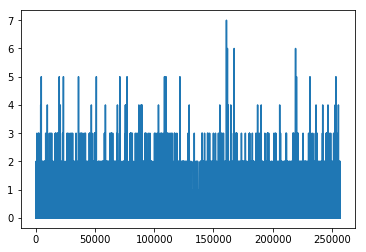

In [64]:
plt.plot(df_noDup['Bankruptcies'])

In [65]:
df_noDup[df_noDup['Bankruptcies'] >= 6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
160978,a02938aa-43cc-4aaa-a2a7-f2fda5654477,bec520de-23c0-4c99-8620-e83163ead72b,Fully Paid,99999999,Short Term,737.0,5 years,Rent,105914.0,Debt Consolidation,"$1,059.14",17.7,11,7,6663,9686,7.0,0.0
161801,a0f75669-2515-4568-9d63-4f48c03b2bd1,8f831a05-8b50-4255-83ca-efa976d1cc3a,Fully Paid,9554,Short Term,743.0,n/a,Home Mortgage,54736.0,Debt Consolidation,$365.37,21.7,17,6,7634,18990,6.0,0.0
167494,a69b8d44-b13a-4e02-aa40-efe4792e2023,f7b5d4ed-f0b3-4493-bb63-fe25f4c69e19,Fully Paid,99999999,Short Term,687.0,7 years,Rent,56045.0,Other,$449.30,15.4,9,6,4635,7951,6.0,0.0
219326,da40ab13-aae7-488e-9699-dab18724f32f,06a5c4f8-6a3d-42c5-9c8b-e21dac1dca4f,Fully Paid,8155,Short Term,NaN,10+ years,Rent,NaN,Home Improvements,$220.23,29.3,8,6,7327,19698,6.0,0.0


In [66]:
df_noDup['Credit Score'].describe()

count    171202.000000
mean       1261.776013
std        1775.229972
min         585.000000
25%         716.000000
50%         735.000000
75%         745.000000
max        7510.000000
Name: Credit Score, dtype: float64

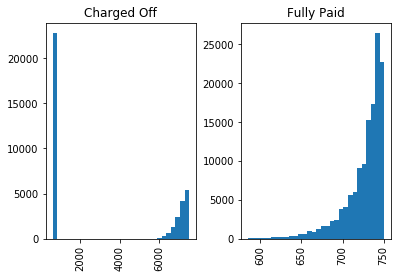

In [67]:
df_noDup.hist(column ='Credit Score', by = 'Loan Status',bins=30);

In [68]:
df_noDup[df_noDup['Credit Score'] > 4000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,7,0,14123,16954,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,9,0,8025,24317,0.0,0.0
71,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,6007,Short Term,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,$538.15,23.6,6,0,5077,7811,0.0,0.0
73,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,12899,Long Term,6670.0,2 years,Rent,133947.0,Debt Consolidation,"$1,931.07",18.4,16,0,39417,90199,0.0,0.0
79,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,5060,Short Term,7270.0,< 1 year,Home Mortgage,62738.0,Other,$711.03,20.4,6,0,10777,12041,0.0,0.0
84,00158423-d7a4-4fef-8e0d-ad8de93e8ba1,11e878dc-0982-4c6b-a32a-ef5fca6ed6f4,Charged Off,11546,Long Term,7070.0,9 years,Rent,33551.0,Debt Consolidation,$522.84,22.7,17,0,12113,15630,0.0,0.0
88,00163613-1360-4e43-8fbc-7818032510b7,2eba693e-f810-459d-8df7-9a2376138466,Charged Off,5041,Short Term,7370.0,2 years,Rent,51147.0,Debt Consolidation,$613.77,10.9,11,0,3644,4428,0.0,0.0
112,001ce813-522a-4a34-bbcc-21eaeae79aea,cc73a15c-7ad4-4101-a2af-57306c335285,Charged Off,15306,Long Term,7060.0,7 years,Rent,45204.0,Debt Consolidation,$388.00,14.0,11,0,15774,24999,0.0,0.0
126,00205bb2-b17c-4001-84ac-c6d928e4eaa6,45aa9267-04f2-49b5-8991-7bb1ffc8f669,Charged Off,14834,Short Term,7410.0,3 years,Home Mortgage,98890.0,Debt Consolidation,"$2,398.08",16.0,8,0,5810,5736,0.0,0.0
133,00221528-22cc-422d-ace3-71a4c5a43e59,79791672-07e1-423e-bc3e-beecee96e4a6,Charged Off,3278,Short Term,7330.0,n/a,Rent,39948.0,Medical Bills,$581.90,21.5,10,0,10392,14042,0.0,0.0


In [69]:
#df_noDup['Credit Score'] = np.where(df_noDup['Credit Score'] > 850,df_noDup['Credit Score'],(df_noDup['Credit Score']/10))
#This runs but doesnt update values

In [70]:
df_noDup.loc[df_noDup['Credit Score'] > 850, ['Credit Score']] = df_noDup['Credit Score']/10

In [71]:
df_noDup[df_noDup['Credit Score'] > 1000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


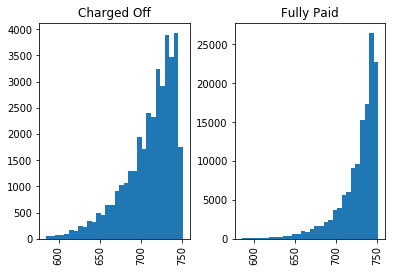

In [72]:
df_noDup.hist(column ='Credit Score', by = 'Loan Status',bins=30);

In [73]:
df_noDup.groupby(['Loan Status'])['Credit Score'].mean()

Loan Status
Charged Off    710.242235
Fully Paid     726.231919
Name: Credit Score, dtype: float64

In [74]:
df_noDup['Credit Score'] = df_noDup.groupby(['Loan Status'])['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [75]:
df_noDup['Credit Score'].isnull().sum()

0

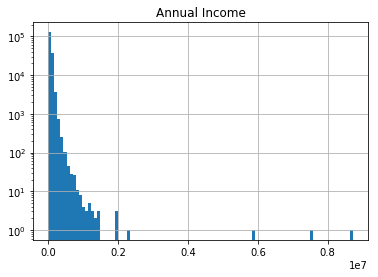

In [76]:
df_noDup.hist('Annual Income',log=True, bins=100);

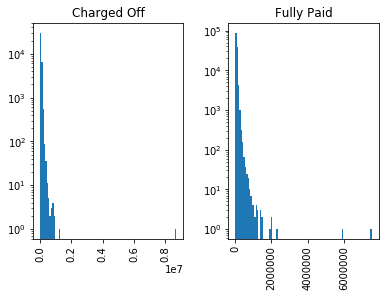

In [77]:
df_noDup.hist(column ='Annual Income', by = 'Loan Status',log = True, bins=100);
#df_noDup.groupby(['Loan Status'])['Annual Income'].mean()

In [78]:
df_noDup.groupby(['Loan Status'])['Annual Income'].mean()

Loan Status
Charged Off    65786.505185
Fully Paid     74754.133622
Name: Annual Income, dtype: float64

In [79]:
df_noDup['Annual Income'] = df_noDup.groupby(['Loan Status'])['Annual Income'].transform(lambda x: x.fillna(x.mean()))

In [80]:
df_noDup['Annual Income'].isnull().sum()

0

In [81]:
df_noDup['Tax Liens'] = df_noDup['Tax Liens'].fillna(df_noDup['Tax Liens'].median())

In [82]:
df_noDup['Tax Liens'].isnull().sum()

0

In [83]:
df_noDup.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.050627,0.016104,0.012003,-0.000897,0.001095,0.002318,0.003652,-0.001874
Credit Score,0.050627,1.000000,0.016520,0.076819,-0.034413,-0.055836,-0.012287,-0.043135,-0.025013
Annual Income,0.016104,0.016520,1.000000,0.138487,0.129375,-0.015520,0.262797,-0.042208,0.032649
Years of Credit History,0.012003,0.076819,0.138487,1.000000,0.130020,0.060393,0.202266,0.060806,0.021051
Number of Open Accounts,-0.000897,-0.034413,0.129375,0.130020,1.000000,-0.015721,0.221705,-0.023934,0.004559
Number of Credit Problems,0.001095,-0.055836,-0.015520,0.060393,-0.015721,1.000000,-0.106359,0.763322,0.579008
Current Credit Balance,0.002318,-0.012287,0.262797,0.202266,0.221705,-0.106359,1.000000,-0.119902,-0.012301
Bankruptcies,0.003652,-0.043135,-0.042208,0.060806,-0.023934,0.763322,-0.119902,1.000000,0.049904
Tax Liens,-0.001874,-0.025013,0.032649,0.021051,0.004559,0.579008,-0.012301,0.049904,1.000000


In [84]:
# Convert float to int
df_noDup['Credit Score'] = df_noDup['Credit Score'].astype(int)
df_noDup['Annual Income'] = df_noDup['Annual Income'].astype(int)
df_noDup['Bankruptcies'] = df_noDup['Bankruptcies'].astype(int)
df_noDup['Tax Liens'] = df_noDup['Tax Liens'].astype(int)

In [85]:
# 99999999 might be similar to nulls
df_noDup[df_noDup['Current Loan Amount'] == 99999999]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742,3 years,Home Mortgage,64760,Debt Consolidation,$582.84,26.8,11,0,8880,22711,0,0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6 years,Home Mortgage,65605,Debt Consolidation,$984.07,21.0,5,1,11514,17262,1,0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745,10+ years,Rent,39476,Other,$483.58,15.4,12,0,4636,21171,0,0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724,1 year,Own Home,34297,Home Improvements,$777.38,13.6,12,0,6720,53335,0,0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750,10+ years,Own Home,86785,Other,$56.41,22.0,7,0,3959,63862,0,0
50,000b0c71-cc87-421f-a029-a5f1af821cd6,ad0225ef-eb40-497a-ae09-ed0f9d78652d,Fully Paid,99999999,Short Term,739,5 years,Home Mortgage,60660,Debt Consolidation,$279.04,23.6,8,0,5798,6371,0,0
58,000c3084-cde2-4665-9095-bfd8270da178,45f17e3f-0ba0-42fb-9686-9497d0800745,Fully Paid,99999999,Short Term,751,< 1 year,Rent,67490,Debt Consolidation,$944.86,27.2,5,0,3216,12227,0,0
59,000c8f86-1e0a-4085-98aa-4f0d247c0884,1b9b21b9-dc97-403f-80bb-e3e667b99851,Fully Paid,99999999,Short Term,727,2 years,Rent,52825,Debt Consolidation,"$1,360.25",14.3,11,1,34163,43080,1,0
68,000ea924-7245-4b55-b194-e9246569a4d7,6fdcc955-5247-41f5-9f71-0c8b0684d99a,Fully Paid,99999999,Short Term,665,< 1 year,Rent,25000,Debt Consolidation,$148.96,8.0,12,0,5393,5497,0,0
69,000eae45-2495-4c7f-95bc-c9bd6bff42d1,58b46069-3c70-428d-b749-eeb06e47c450,Fully Paid,99999999,Short Term,730,2 years,Rent,35861,Debt Consolidation,$552.85,30.0,8,0,4654,7679,0,0


In [86]:
(len(df_noDup[df_noDup['Current Loan Amount'] == 99999999]) /len(df_noDup['Current Loan Amount']))*100

16.323597589244322

In [87]:
# Replace 99999999 with null and update with mean
df_noDup.loc[df_noDup['Current Loan Amount'] == 99999999,['Current Loan Amount'] ] = 0

In [88]:
df_noDup[df_noDup['Current Loan Amount'] == 99999999]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


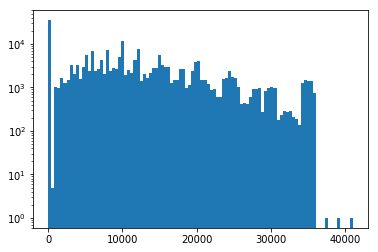

In [89]:
plt.hist(df_noDup['Current Loan Amount'],bins=100,log=True);

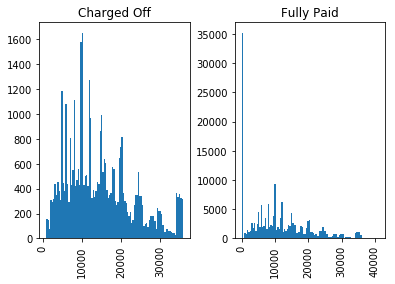

In [90]:
df_noDup.hist(column = 'Current Loan Amount',by = 'Loan Status', bins=100);

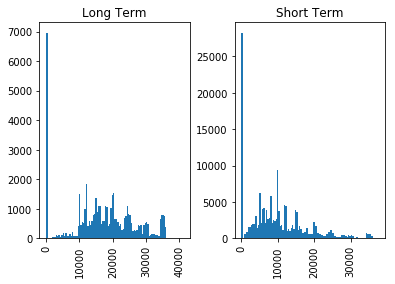

In [91]:
df_noDup.hist(column = 'Current Loan Amount',by = 'Term', bins=100);

In [92]:
#df.groupby('Home Ownership')['Credit Score'].plot(kind='bar')

In [93]:
df_noDup.groupby('Term')['Current Loan Amount'].mean()

Term
Long Term     16986.104622
Short Term     9948.341178
Name: Current Loan Amount, dtype: float64

In [94]:
df_noDup.loc[df_noDup['Current Loan Amount'] == 0,['Current Loan Amount'] ] = np.NaN

In [95]:
#Current Loan Amount got converted to float even after including astype(int)
df_noDup['Current Loan Amount'] = df_noDup.groupby('Term')['Current Loan Amount'].transform(lambda x: x.fillna(x.mean()).astype(int))

In [96]:
df_noDup['Current Loan Amount'] = df_noDup['Current Loan Amount'].astype(int)

In [97]:
df_noDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 18 columns):
Loan ID                      215700 non-null object
Customer ID                  215700 non-null object
Loan Status                  215700 non-null object
Current Loan Amount          215700 non-null int64
Term                         215700 non-null object
Credit Score                 215700 non-null int64
Years in current job         215700 non-null object
Home Ownership               215700 non-null object
Annual Income                215700 non-null int64
Purpose                      215700 non-null object
Monthly Debt                 215700 non-null object
Years of Credit History      215700 non-null float64
Number of Open Accounts      215700 non-null int64
Number of Credit Problems    215700 non-null int64
Current Credit Balance       215700 non-null int64
Maximum Open Credit          215700 non-null object
Bankruptcies                 215700 non-null int64
Tax Liens  

In [98]:
#Monthly Debt
df_noDup['Monthly Debt'] = df_noDup['Monthly Debt'].str.replace('$','')
df_noDup['Monthly Debt'] = df_noDup['Monthly Debt'].str.replace(',','')
df_noDup['Monthly Debt'] = df_noDup['Monthly Debt'].str.strip()
df_noDup['Monthly Debt'] = df_noDup['Monthly Debt'].astype(float)

In [99]:
#Maximum Open Credit
df_noDup.loc[df_noDup['Maximum Open Credit'] == '#VALUE!',['Maximum Open Credit']] = np.NaN
df_noDup['Maximum Open Credit'] = df_noDup['Maximum Open Credit'].astype(float)
df_noDup['Maximum Open Credit'] = df_noDup['Maximum Open Credit'].fillna(df_noDup['Maximum Open Credit'].mean())

In [100]:
#LABEL ENCODER
df_noDup['Loan Status'] = df_noDup['Loan Status'].astype('category')
df_noDup['Loan Status Code'] = df_noDup['Loan Status'].cat.codes

In [101]:
# This gives the mapping of categories to codes
dict( enumerate(df_noDup['Loan Status'].cat.categories) )

{0: 'Charged Off', 1: 'Fully Paid'}

In [102]:
df_noDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                      215700 non-null object
Customer ID                  215700 non-null object
Loan Status                  215700 non-null category
Current Loan Amount          215700 non-null int64
Term                         215700 non-null object
Credit Score                 215700 non-null int64
Years in current job         215700 non-null object
Home Ownership               215700 non-null object
Annual Income                215700 non-null int64
Purpose                      215700 non-null object
Monthly Debt                 215700 non-null float64
Years of Credit History      215700 non-null float64
Number of Open Accounts      215700 non-null int64
Number of Credit Problems    215700 non-null int64
Current Credit Balance       215700 non-null int64
Maximum Open Credit          215700 non-null float64
Bankruptcies                 215700 non-null int64
Tax Lie

In [103]:
df_noDup

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Code
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10+ years,Home Mortgage,33694,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0,0,1
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4 years,Home Mortgage,42269,Other,1106.04,26.3,17,0,6262,19149.0,0,0,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10+ years,Home Mortgage,90126,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0,0,1
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10+ years,Own Home,38072,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0,0,1
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4 years,Rent,50025,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0,0,1
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716,10+ years,Rent,41853,Business Loan,561.52,13.2,4,1,2289,4671.0,1,0,1
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,664,6 years,Rent,49225,Business Loan,542.29,17.6,7,0,14123,16954.0,0,0,0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,726,5 years,Rent,74754,Debt Consolidation,386.36,17.7,7,0,11970,16579.0,0,0,1
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733,n/a,Home Mortgage,55985,Debt Consolidation,741.79,19.8,7,0,10926,15676.0,0,0,1
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,11980,Short Term,742,3 years,Home Mortgage,64760,Debt Consolidation,582.84,26.8,11,0,8880,22711.0,0,0,1


In [104]:
x = df_noDup.copy(deep=True)

In [105]:
x

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Code
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10+ years,Home Mortgage,33694,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0,0,1
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4 years,Home Mortgage,42269,Other,1106.04,26.3,17,0,6262,19149.0,0,0,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10+ years,Home Mortgage,90126,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0,0,1
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10+ years,Own Home,38072,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0,0,1
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4 years,Rent,50025,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0,0,1
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716,10+ years,Rent,41853,Business Loan,561.52,13.2,4,1,2289,4671.0,1,0,1
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,664,6 years,Rent,49225,Business Loan,542.29,17.6,7,0,14123,16954.0,0,0,0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,726,5 years,Rent,74754,Debt Consolidation,386.36,17.7,7,0,11970,16579.0,0,0,1
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733,n/a,Home Mortgage,55985,Debt Consolidation,741.79,19.8,7,0,10926,15676.0,0,0,1
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,11980,Short Term,742,3 years,Home Mortgage,64760,Debt Consolidation,582.84,26.8,11,0,8880,22711.0,0,0,1


In [106]:
y = x['Loan Status Code']
x.drop(['Loan ID','Customer ID','Loan Status','Loan Status Code'],axis = 1, inplace = True)

In [107]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 15 columns):
Current Loan Amount          215700 non-null int64
Term                         215700 non-null object
Credit Score                 215700 non-null int64
Years in current job         215700 non-null object
Home Ownership               215700 non-null object
Annual Income                215700 non-null int64
Purpose                      215700 non-null object
Monthly Debt                 215700 non-null float64
Years of Credit History      215700 non-null float64
Number of Open Accounts      215700 non-null int64
Number of Credit Problems    215700 non-null int64
Current Credit Balance       215700 non-null int64
Maximum Open Credit          215700 non-null float64
Bankruptcies                 215700 non-null int64
Tax Liens                    215700 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 26.3+ MB


In [108]:
X = pd.get_dummies(x,drop_first=True)

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 34 columns):
Current Loan Amount               215700 non-null int64
Credit Score                      215700 non-null int64
Annual Income                     215700 non-null int64
Monthly Debt                      215700 non-null float64
Years of Credit History           215700 non-null float64
Number of Open Accounts           215700 non-null int64
Number of Credit Problems         215700 non-null int64
Current Credit Balance            215700 non-null int64
Maximum Open Credit               215700 non-null float64
Bankruptcies                      215700 non-null int64
Tax Liens                         215700 non-null int64
Term_Short Term                   215700 non-null uint8
Years in current job_10+ years    215700 non-null uint8
Years in current job_2 years      215700 non-null uint8
Years in current job_3 years      215700 non-null uint8
Years in current job_4 years      215700 no

In [110]:
import seaborn as sns

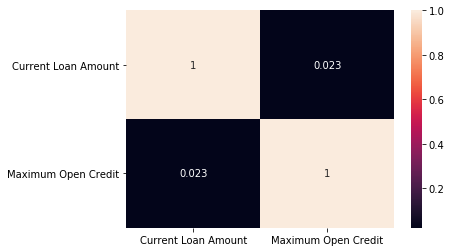

In [111]:
sns.heatmap(X[['Current Loan Amount','Maximum Open Credit']].corr(),annot = True)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, random_state=0)

In [113]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100,random_state=3, max_depth=5)
model_clf = clf.fit(X_train,y_train)
clfpred = model_clf.predict(X_train)
print(accuracy_score(y_train,clfpred))

clfpredtest = model_clf.predict(X_test)
print(accuracy_score(y_test,clfpredtest))

0.816718822439
0.81729253593


In [114]:
#Gradient Boost
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.05,random_state=0)
model_gbc = gbc.fit(X_train,y_train)
gbcpred = model_gbc.predict(X_train)
print("Train Accuracy = ",accuracy_score(y_train,gbcpred))

gbcpredtest = model_gbc.predict(X_test)
print("Test Accuracy = ",accuracy_score(y_test,gbcpredtest))

Train Accuracy =  0.832440890125
Test Accuracy =  0.833124710246


In [115]:
#Logistic Regression
lr = LogisticRegression()
logmodel = lr.fit(X_train,y_train)
logpred = logmodel.predict(X_train)
print(accuracy_score(y_train,logpred))

logpredtest = logmodel.predict(X_test)
print(accuracy_score(y_test,logpredtest))

0.816521789522
0.817107093185


In [116]:
feature_importance = gbc.feature_importances_
feature_importance

array([ 0.40317258,  0.24398955,  0.23883923,  0.04014361,  0.        ,
        0.00295046,  0.        ,  0.00647766,  0.00400117,  0.0004523 ,
        0.        ,  0.02106919,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.02079102,  0.00191637,  0.        ,
        0.01619686,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

Text(0.5,0,'Importance')

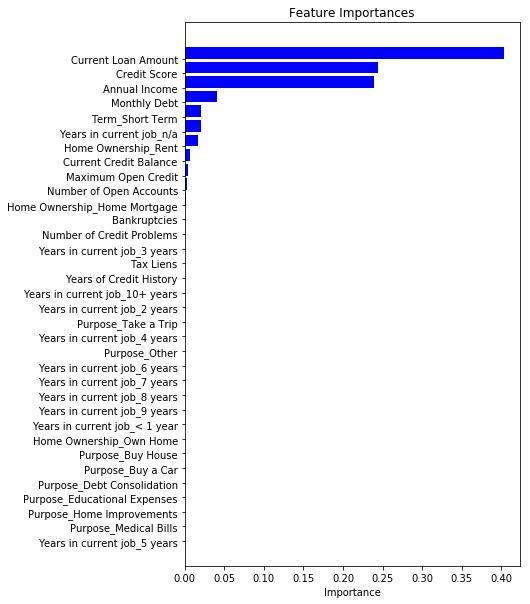

In [117]:

# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())

feature_importance = gbc.feature_importances_
indices = np.argsort(feature_importance)
features = X.columns

plt.figure(figsize = (6,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='edge')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')


In [118]:
#Place all the feature importance columns into Decision tree and plot to get business rules

## Questions 

1. Loan Amount requested
2. Customer Credit Score
3. Annual Income
4. Monthly Debt
5. Term
6. Years in current job
7. Home Ownership
8. Current Credit balance
9. Max open accounts

In [119]:
# DF['LOAN STATUS'].VALUES_COUNTS.PLOT(KIND=BAR)